In [24]:
#data wrangling
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
df = pd.read_excel("KPMG.xlsx")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
# describe default
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
df.describe(include='object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
#describe all
df.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [7]:
# count số dòng bị null ở mỗi cột
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
df_copy = df
df_copy = df_copy.dropna()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [9]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = df.dropna()
df_dropna_all.info()
df_dropna_all.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [10]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = df.dropna(subset = ['online_order'])
df_dropna_online_order.info()
df_dropna_online_order.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19640 non-null int64
product_id                 19640 non-null int64
customer_id                19640 non-null int64
transaction_date           19640 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               19640 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19640 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      195
product_line               195
product_class              195
product_size               195
list_price                   0
standard_cost              195
product_first_sold_date    195
dtype: int64

## 1.2 Fill NA

In [11]:
# fill tất cả NA bằng 0 và lưu vào bảng df_fillna_0
df_fillna_0 = df.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [12]:
# fill NA bằng ffill và lưu vào bảng df_fillna_ffill
df_fillna_ffill = df.fillna(method = "ffill")
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
# fill NA bằng bfill và lưu vào bảng df_fillna_bfill
df_fillna_bfill = df.fillna(method = "bfill")
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


## 1.3. Assess Categorial Data

In [30]:
# load sheet Demographic và hiển thị top head
# describe các giá trị object
df_CD = pd.read_excel("KPMG.xlsx", sheet_name = "CustomerDemographic")
df_CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [31]:
df_CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [22]:
# describe các giá trị object
df_CD.describe(include = "object")

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Tobe,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [37]:
# Remove all NA row
df_CD = df_CD.dropna()

In [38]:
# In ra các giá trị unique của cột gender
df_CD["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [39]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
df_CD["gender"] = df_CD["gender"].replace({"F": "Female", "Femal": "Female", "M":"Male", "U":"Unisex"})
df_CD["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
df_CD['Age'] = int(dt.datetime.today().strftime("%Y")) - df_CD["DOB"].dt.strftime("%Y").astype(int)
print('min age: ', df_CD['Age'].min())
print('max age: ', df_CD['Age'].max())

min age:  19
max age:  90


In [49]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
df_CD["Age_Group"] = pd.cut(df_CD.Age,bins=[0,36,55,100],labels=['Young Adults','Middle Age','Older'])
df_CD[df_CD["Age"] == 35]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_Group
227,228,Lucia,Pickervance,Female,59,1986-05-25,Systems Administrator II,Manufacturing,High Net Worth,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,No,12.0,35,Young Adults
232,233,Art,Barwell,Male,34,1986-08-08,Environmental Tech,Property,Mass Customer,N,â°â´âµ,No,13.0,35,Young Adults
283,284,Seth,Moorman,Male,38,1986-04-11,Financial Analyst,Financial Services,High Net Worth,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,9.0,35,Young Adults
323,324,Franz,Lyptrit,Male,97,1986-08-05,Computer Systems Analyst I,IT,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,15.0,35,Young Adults
400,401,Halette,Helling,Female,56,1986-12-11,Assistant Professor,Retail,Mass Customer,N,â¡,No,15.0,35,Young Adults
458,459,Bel,Cheeke,Female,88,1986-08-04,Civil Engineer,Manufacturing,Mass Customer,N,-0.5,Yes,13.0,35,Young Adults
582,583,Tirrell,Haysham,Male,97,1986-04-14,Registered Nurse,Health,Mass Customer,N,1000000000000000049861653971908893017010268485...,No,4.0,35,Young Adults
610,611,Otto,Huriche,Male,58,1986-12-20,Help Desk Technician,Manufacturing,Mass Customer,N,"<>?:""{}|_+",Yes,16.0,35,Young Adults
629,630,D'arcy,Rowden,Male,90,1986-08-11,Statistician III,Property,Affluent Customer,N,1,Yes,17.0,35,Young Adults
696,697,Weston,Brokenshaw,Male,25,1986-11-29,Environmental Specialist,Entertainment,Mass Customer,N,../../../../../../../../../../../etc/passwd%00,No,10.0,35,Young Adults


# 2. Data Completeness

In [52]:
#joinning data sale vs demographic, show ra những trường hợp missing trong demographic
df = df.dropna()
df_join = df.merge(df_CD, how = "left", on = "customer_id")
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
transaction_id                         19445 non-null int64
product_id                             19445 non-null int64
customer_id                            19445 non-null int64
transaction_date                       19445 non-null datetime64[ns]
online_order                           19445 non-null float64
order_status                           19445 non-null object
brand                                  19445 non-null object
product_line                           19445 non-null object
product_class                          19445 non-null object
product_size                           19445 non-null object
list_price                             19445 non-null float64
standard_cost                          19445 non-null float64
product_first_sold_date                19445 non-null float64
first_name                             12982 non-null object
last_name                   

In [53]:
df_join[df_join["first_name"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age,Age_Group
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,5,1986,2017-01-17,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,79,2426,2017-04-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,89,2822,2017-06-11,0.0,Approved,WeareA2B,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,26,64,2596,2017-01-10,0.0,Approved,Trek Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,31,88,2810,2017-09-05,1.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,25,1272,2017-03-20,0.0,Approved,Giant Bicycles,Road,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,42,79,3398,2017-05-14,0.0,Approved,Solex,Touring,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,55,2787,2017-06-07,1.0,Approved,Trek Bicycles,Road,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation

In [15]:
# tính tổng khách hàng

# Tính trung bình khách hàng mỗi tháng

# Tính Gross magin của mỗi tháng

# Tính số lần mua hàng của mỗi khách hàng

# Tính số lượng khách hàng tương ứng với số lần mua hàng

# Tính doanh thu dựa trên order_status

# Tính số lượng order và doanh thu group by online_order và order_status 


In [ ]:
# Visualization by seaborn - 5 chart with multiple type



In [54]:
df_copy['customer_id'].value_counts()

2476    14
1068    14
2183    14
1302    13
1913    13
637     13
2548    13
2464    13
2912    13
3232    13
1129    13
1946    13
2072    13
3326    13
1103    12
3048    12
2240    12
2309    12
1611    12
1821    12
2036    12
1227    12
2659    12
25      12
1762    12
1482    12
1783    12
39      12
1745    12
2826    12
        ..
278      1
1768     1
1448     1
71       1
3272     1
1632     1
1921     1
1569     1
1757     1
2326     1
3279     1
1387     1
2423     1
3428     1
3392     1
872      1
1488     1
2291     1
1846     1
3040     1
2477     1
2525     1
2417     1
3024     1
3179     1
2271     1
2532     1
1544     1
373      1
2047     1
Name: customer_id, Length: 3492, dtype: int64

In [55]:
df_copy.agg({"transaction_date": ["max", "min"]}).transpose()

,max,min
transaction_date,2017-12-30,2017-01-01


In [56]:
df_copy.agg({"online_order": "count"}).transpose()

online_order    19445
dtype: int64

In [57]:
df_copy.groupby("online_order").count()

,transaction_id,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
online_order,,,,,,,,,,,,
0.0,9706,9706,9706,9706,9706,9706,9706,9706,9706,9706,9706,9706
1.0,9739,9739,9739,9739,9739,9739,9739,9739,9739,9739,9739,9739


In [58]:
df_copy.groupby(["online_order",'order_status']).agg({'transaction_date':'count'})

transaction_date
online_order order_status                  
0.0          Approved                  9631
             Cancelled                   75
1.0          Approved                  9642
             Cancelled                   97

In [59]:
price = df_copy.groupby('order_status').agg({'list_price':'sum'})
price

,list_price
order_status,
Approved,21336409.64
Cancelled,195762.08


In [60]:
price_new = price.reset_index()
price_new

,order_status,list_price
0,Approved,21336409.64
1,Cancelled,195762.08


In [68]:
sns.barplot(price.order_status, price.list_price)

AttributeError: 'DataFrame' object has no attribute 'order_status'

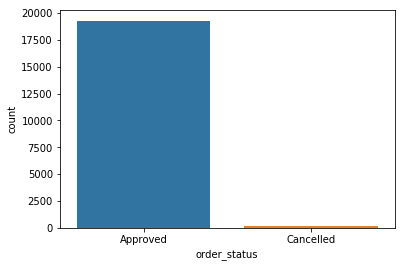

In [62]:
sns.countplot(df_copy.order_status)

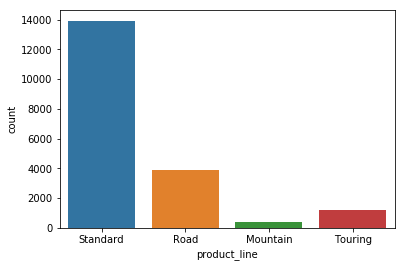

In [63]:
sns.countplot(df_copy.product_line)

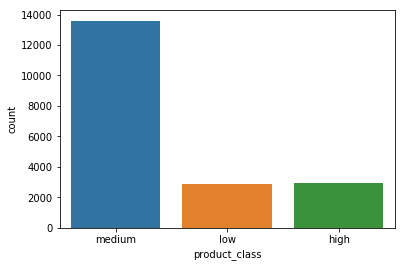

In [64]:
sns.countplot(df_copy.product_class)

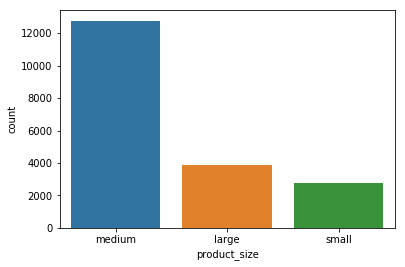

In [65]:
sns.countplot(df_copy.product_size)